# House Price Prediction ##

## Context 

The price of the house depends on various factors like locality, connectivity, number of rooms, etc. Change in the mindset of the millennial generation also contributes to ups and down in house prices as the young generation is much into renting than to owe a house. Predicting the right price of the house is important for investors in the real estate business. This makes it very important to come up with proper and smart technique to estimate the true price of the house.

## Problem Statement

You are willing to sell your house. You are not sure about the price of your house and want to estimate its price. You are provided with the dataset and need to make a prediction model which will help you to get a good estimate of your house for selling it.

## Data Description

The housing dataset contains the prices and other attributes. There are 
 rows and 
 attributes (features) with a target column (price).

Following are the features:



## things to do

1. Convert categorical attributes into numerical attributes using feature encoding.
2. Explore the Housing dataset by creating the following plots:

  * histogram of each feature.
  * heat map of correlation between each and every features.
  * making normal distribution curve of price

3. Build a linear regression model and Random forest model by selecting the most relevant features to predict the price of houses.

4. Evaluate the model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and then compare the best model accoring to r^2 score

## 1. Import Modules and Load Dataset

In [2]:
# Import the required modules and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("house-prices (1).csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# Check if there are any NULL values.
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# Check categorical attributes
df_cat=df.select_dtypes(['object'])
df_cat.head()


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


## 2. Feature encoding

Perform feature encoding using map() function and one-hot encoding.

In [6]:
# Replace yes with 1 and no with 0 for all the values in features 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' using map() function.

a=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes':1,'no':0})
df[a]=df[a].apply(binary_map)

In [7]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
# Replace furnishingstatus with 0, 1 and 2
furnished = {'furnished':0, 'semi-furnished':1,'unfurnished':2 }
df['furnishingstatus'] = df['furnishingstatus'].map(furnished)

In [9]:
# Print dataframe
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


## 3. EDA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4766729.247706422


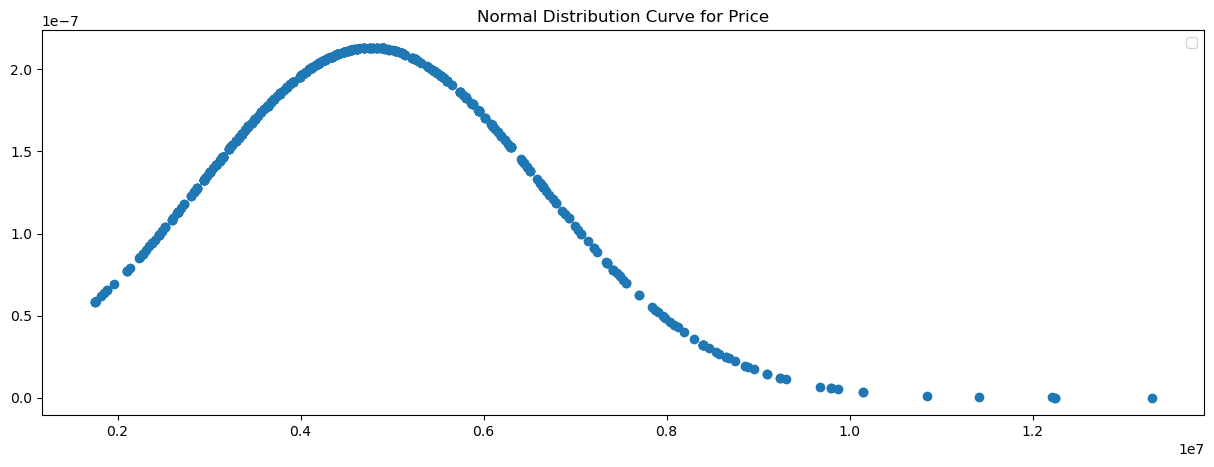

In [11]:
# Create a normal distribution curve for the 'price'.

# Create a probablity density function for plotting the normal distribution
def prob_density_func(series):
  CONST = 1 / (series.std() * np.sqrt(2 * np.pi))
  power_of_e = - (series - series.mean()) ** 2 / (2 * series.var()) # 'pd.Series.var()' function returns the variance of the series.
  new_array = CONST * np.exp(power_of_e)
  return new_array


# Plot the normal distribution curve using plt.scatter()
print(df['price'].mean())
plt.figure(figsize=[15,5])
plt.scatter(df['price'],prob_density_func(df['price']))
plt.title('Normal Distribution Curve for Price')
plt.legend()
plt.show() 


In [12]:
# finding the correlation between price and features
df.corr()['price']

price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus   -0.304721
Name: price, dtype: float64

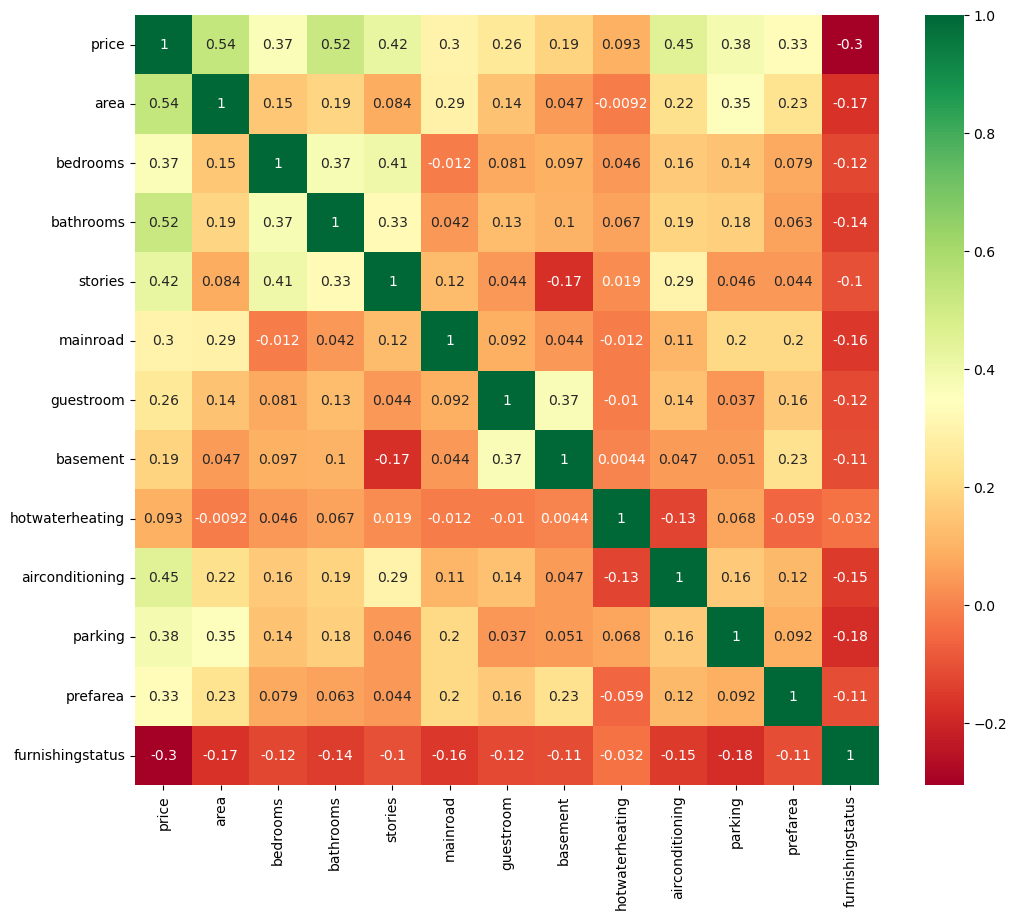

In [13]:
#Construct heat map for clean data

plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [14]:
# removing the 'hotwaterheating' feature as it do not effect the independent variable as much.

df = df.drop('hotwaterheating', axis=1)

## 4. Model Building and Evaluation

Build a multiple linear regression model using the statsmodels.api module.

In [15]:
# creating variables of feature and target variable

y = df["price"]
X = df.loc[:, df.columns !="price"]

In [16]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split


# Split the DataFrame into the train and test sets such that test set has 25% of the values.

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.25, random_state = 42)

## Linear Regression

In [17]:
# Importing library for linear regression model
from sklearn.linear_model import LinearRegression

In [18]:
lr= LinearRegression()
lr.fit(Xtrain, ytrain)


LinearRegression()

In [19]:
# Value of y intercept
lr.intercept_

306771.32856021076

In [20]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([Xtrain.columns,lr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,area,240.20245
1,bedrooms,73712.433874
2,bathrooms,1134490.550531
3,stories,397552.861753
4,mainroad,366518.565802
5,guestroom,260126.049321
6,basement,404436.135922
7,airconditioning,709254.93488
8,parking,277818.422931
9,prefarea,612590.488612


In [26]:
# Model prediction on train data
y_pred = lr.predict(Xtrain)

In [21]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_test_pred = lr.predict(Xtest)
y_train_pred = lr.predict(Xtrain)

print(f"\n\nTrain Set\n{'-' * 50}")
print(f"R-squared: {r2_score(ytrain, y_train_pred):.6f}")
print(f"Mean Squared Error: {mean_squared_error(ytrain, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(ytrain, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(ytrain, y_train_pred):.3f}")




Train Set
--------------------------------------------------
R-squared: 0.677042
Mean Squared Error: 1006465542252.512
Root Mean Squared Error: 1003227.563
Mean Absolute Error: 727129.238


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

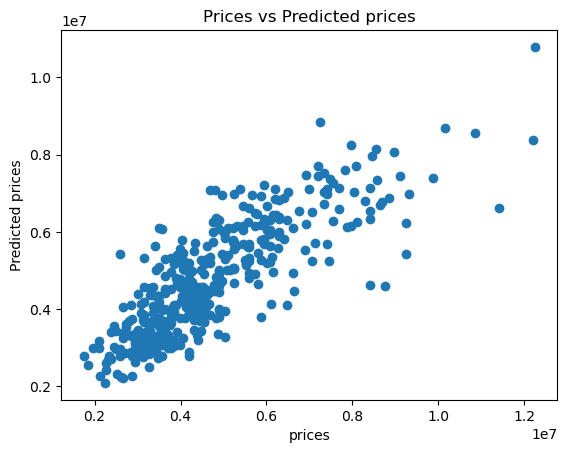

In [22]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(ytrain, y_pred)
plt.xlabel("prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

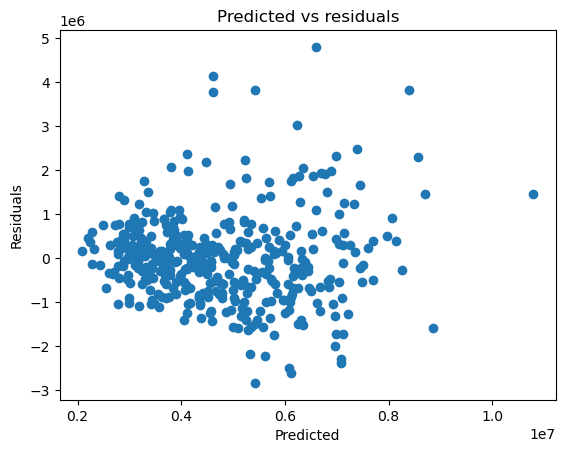

In [23]:
# Checking residuals
plt.scatter(y_pred,ytrain-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

C:\Users\khume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


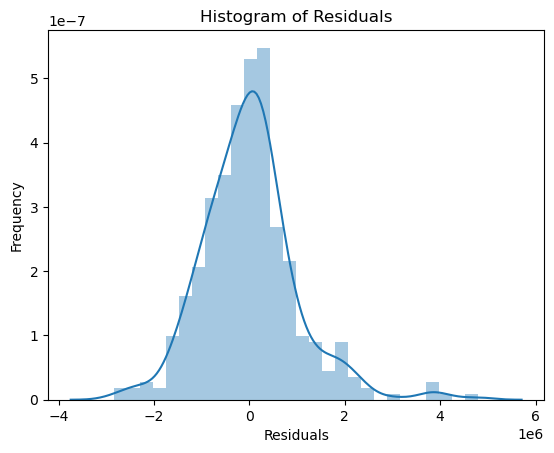

In [24]:
# Checking Normality of errors
sns.distplot(ytrain-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

In [25]:
# Model Evaluation

print(f"\n\nTest Set\n{'-' * 50}")
lr_r2 = (f"R-squared: {r2_score(ytest, y_test_pred):.3f}")
print(lr_r2)
print(f"Mean Squared Error: {mean_squared_error(ytest, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(ytest, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(ytest, y_test_pred):.3f}")



Test Set
--------------------------------------------------
R-squared: 0.649
Mean Squared Error: 1615534917450.652
Root Mean Squared Error: 1271036.946
Mean Absolute Error: 937252.646


## Random Forest Regressor

In [26]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(Xtrain, ytrain)

RandomForestRegressor()

In [27]:
# Model prediction on train data
y_pred = reg.predict(Xtrain)

In [28]:
y_test_pred = reg.predict(Xtest)
y_train_pred = reg.predict(Xtrain)

print(f"\n\nTrain Set\n{'-' * 50}")
print(f"R-squared: {r2_score(ytrain, y_train_pred):.6f}")
print(f"Mean Squared Error: {mean_squared_error(ytrain, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(ytrain, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(ytrain, y_train_pred):.3f}")




Train Set
--------------------------------------------------
R-squared: 0.949525
Mean Squared Error: 157300098249.651
Root Mean Squared Error: 396610.764
Mean Absolute Error: 281484.395


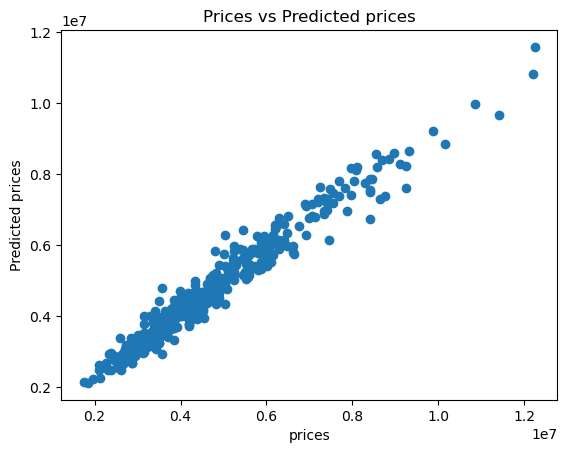

In [29]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(ytrain, y_pred)
plt.xlabel("prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

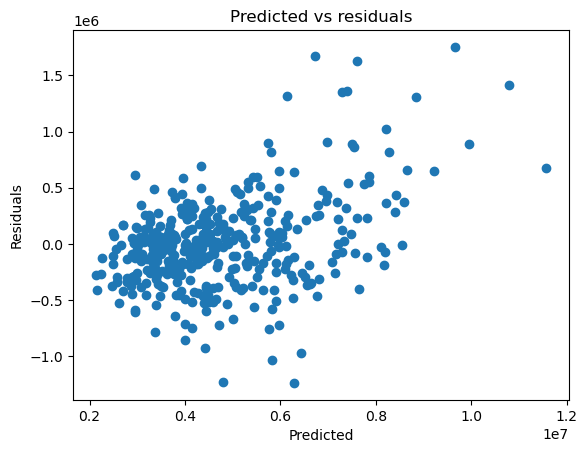

In [30]:
# Checking residuals
plt.scatter(y_pred,ytrain-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### for test data

In [31]:
# Model Evaluation

print(f"\n\nTest Set\n{'-' * 50}")
reg_r2 = (f"R-squared: {r2_score(ytest, y_test_pred):.3f}")
print(reg_r2)
print(f"Mean Squared Error: {mean_squared_error(ytest, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(ytest, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(ytest, y_test_pred):.3f}")



Test Set
--------------------------------------------------
R-squared: 0.540
Mean Squared Error: 2119457717376.514
Root Mean Squared Error: 1455835.745
Mean Absolute Error: 1032152.504


## Evaluation and comparision of all the models

In [32]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R-squared Score': [lr_r2*100, reg_r2*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
0,Linear Regression,R-squared: 0.649R-squared: 0.649R-squared: 0.6...
1,Random Forest,R-squared: 0.540R-squared: 0.540R-squared: 0.5...


### Hence Linear Regression works the best for this dataset.** 